# Load & Info & Data Preprocessing

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the sessions dataset
X = pd.read_csv('../data/Airbnb_xtrain_v4.csv')
y = pd.read_csv('../data/Airbnb_ytrainVersion2.csv')

In [233]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

# # Create a count plot
# sns.countplot(y='country_destination', data=y, order=y['country_destination'].value_counts().index)

# plt.title("Distribution of Country Destinations", size=13)
# plt.xlabel("Number of Users")
# plt.ylabel("Country Destination")
# plt.grid(axis='x')  # Add grid lines to the x-axis for better readability

# # Calculate and display the percentage labels on each bar
# total = len(y)
# for p in plt.gca().patches:
#     percentage = '{:.1f}%'.format(100 * p.get_width() / total)
#     x = p.get_x() + p.get_width() + 0.02  # Adjust the position of the label
#     y = p.get_y() + p.get_height() / 2
#     plt.annotate(percentage, (x, y))

# plt.show()

In [234]:
#Checking null values
X.isnull().sum()

Unnamed: 0      0
c_417           0
c_440           0
c_413           0
age_NAN         0
               ..
c_188           0
gender_OTHER    0
language_ja     0
c_62            0
c_75            0
Length: 301, dtype: int64

In [235]:
X = X.dropna()

In [236]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.4, random_state=0)
X_test.shape

(29525, 301)

In [237]:
print(X_train.dtypes)

Unnamed: 0        int64
c_417           float64
c_440           float64
c_413           float64
age_NAN           int64
                 ...   
c_188           float64
gender_OTHER      int64
language_ja       int64
c_62            float64
c_75            float64
Length: 301, dtype: object


In [238]:
print(y_train.dtypes)

country_destination    object
dtype: object


# selector1

In [239]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

# selector = SelectKBest(chi2, k=100)
# selector.fit(X_train, y_train)

# selected_feature_indices = selector.get_support(indices=True)

# selected_feature_names = X_train.columns[selected_feature_indices]
# print(selected_feature_names)

In [240]:
# # Mutual Information : utilisée pour évaluer la relation entre chaque caractéristique et la variable cible.
# # Elle mesure la quantité d'information que chaque caractéristique fournit sur la variable cible.

# from sklearn.feature_selection import mutual_info_classif

# mutual_info= mutual_info_classif(X_train, y_train)
# mutual_info = pd.Series (mutual_info)
# mutual_info.index = X_train.columns
# mutual_info.sort_values(ascending=False)

In [241]:
mutual_info.sort_values(ascending=False).head(23)

signup_flow_24.0                     0.007562
age_NAN                              0.006970
tfa_season_1                         0.006418
c_298                                0.006098
first_affiliate_tracked_omg          0.005605
c_197                                0.005584
c_329                                0.005521
tfa_wd_2                             0.005374
gender_-unknown-                     0.005373
signup_method_basic                  0.005339
first_browser_-unknown-              0.005317
c_418                                0.005266
Unnamed: 0                           0.005205
c_411                                0.005167
c_355                                0.005030
c_359                                0.004977
c_149                                0.004616
affiliate_channel_direct             0.004481
c_177                                0.004329
c_214                                0.004145
c_437                                0.004092
first_affiliate_tracked_untracked 

## selector2

We need to convert "country_destination" to int

In [242]:
# # SelectPercentile : est une approche de sélection de caractéristiques permet de sélectionner un pourcentage spécifique
# # des caractéristiques les plus importantes en fonction d'un test statistique.
# from sklearn.feature_selection import SelectPercentile
# from sklearn.feature_selection import f_regression

# selector2 = SelectPercentile(f_regression, percentile=60)

# selector2.fit(X, y)

# selected_feature_indices2 = selector2.get_support(indices=True)

# selected_feature_names2 = X.columns[selected_feature_indices2]

# print(selected_feature_names2)

## selector3

In [243]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

# SelectKBest: est une methode de sélection de caractéristiques qui permet de sélectionner les K meilleures caractéristiques
# en fonction d'un test statistique 
selector3 = SelectKBest(f_classif, k=23)
selector3.fit(X, y)

selected_feature_indices = selector3.get_support(indices=True)

selected_feature_names = X.columns[selected_feature_indices]

print(selected_feature_names)

C:\Users\ayoub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['Unnamed: 0', 'tfa_month', 'c_205', 'signup_method_basic', 'c_211',
       'c_355', 'c_180', 'c_55', 'c_79', 'c_156', 'tfa_wd_4', 'c_161',
       'tfa_season_0', 'c_95', 'tfa_wd_7', 'c_144', 'tfa_wd_5', 'c_456',
       'c_117', 'c_427', 'c_134', 'c_158', 'c_137'],
      dtype='object')


# Selected

In [244]:
selected_feature_names

Index(['Unnamed: 0', 'tfa_month', 'c_205', 'signup_method_basic', 'c_211',
       'c_355', 'c_180', 'c_55', 'c_79', 'c_156', 'tfa_wd_4', 'c_161',
       'tfa_season_0', 'c_95', 'tfa_wd_7', 'c_144', 'tfa_wd_5', 'c_456',
       'c_117', 'c_427', 'c_134', 'c_158', 'c_137'],
      dtype='object')

In [245]:
X = X[selected_feature_names]

In [246]:
X = X[:10000]
y = y[:10000]

In [247]:
# sns.heatmap(X.corr(), annot= True)

In [248]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.4, random_state=0)
X_test.shape

(4000, 23)

# Fiting

In [249]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Create a pipeline with preprocessing and the logistic regression model
pipeline = Pipeline([
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))  # Logistic Regression model
])

# Fit the pipeline on your training data
pipeline.fit(X_train, y_train)

C:\Users\ayoub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

# Accuracy

In [250]:
from sklearn.metrics import accuracy_score

# Assuming you have trained your model and obtained predictions
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:}") 

Accuracy: 0.60825


# evaluation

In [251]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

# True labels and predicted labels for your test data
true_labels =  y_test # Replace with your actual true labels
predicted_labels =  y_pred # Replace with your model's predicted labels

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision
precision = precision_score(true_labels, predicted_labels, average='macro')
print(f'Precision: {precision:.2f}')

# Calculate recall
recall = recall_score(true_labels, predicted_labels, average='macro')
print(f'Recall: {recall:.2f}')

# Calculate F1-score
f1 = f1_score(true_labels, predicted_labels, average='macro')
print(f'F1-Score: {f1:.2f}')

# # Calculate ROC-AUC
# roc_auc = roc_auc_score(true_labels, predicted_labels, average='macro')
# print(f'ROC-AUC: {roc_auc:.2f}')

# # Calculate PR-AUC
# pr_auc = average_precision_score(true_labels, predicted_labels, average='macro')
# print(f'PR-AUC: {pr_auc:.2f}')

Accuracy: 0.61
Precision: 0.05


C:\Users\ayoub\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 0.08
F1-Score: 0.06


### Compare
0.6113124470787469 : all

0.6113124470787469 : 300
 
0.6113124470787469 : 100
 
0.6089548194811353 : 50
 
0.6089886879360563 : 25

0.6089886879360563 : 10

0.6090225563909775 : 5

# Predict

In [252]:
X.head()

,Unnamed: 0,tfa_month,c_205,signup_method_basic,c_211,c_355,c_180,c_55,c_79,c_156,...,c_95,tfa_wd_7,c_144,tfa_wd_5,c_456,c_117,c_427,c_134,c_158,c_137
0,137021,1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0,0.0,0.0,0.0,2.0,0.0,0.0
1,137022,1,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,137023,1,0.0,1,1.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,137024,1,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0
4,137025,1,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [253]:
y

,country_destination
0,other
1,NDF
2,NDF
3,NDF
4,GB
...,...
9995,NDF
9996,NDF
9997,NDF
9998,US


In [254]:
# # Assuming new_user_features is your new user's features
# new_user_features = [[1,41,1,5,8,5,55,5,5,5,4,4,9,7,3,9]]  

# # Predict the country destination for the new user
# predicted_destination = pipeline.predict(new_user_features)[0]

# print('Predicted Country Destination:', predicted_destination)

# Visualize

In [255]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[   0    0    0    0    0    0    0    8    0    0    0    0]
 [   0    0    0    0    0    0    0   15    0    0    0    0]
 [   0    0    0    0    0    0    0   12    0    0    0    0]
 [   0    0    0    0    0    0    0   35    0    0    0    0]
 [   0    0    0    0    0    0    0   80    0    0    0    0]
 [   0    0    0    0    0    0    0   22    0    0    0    0]
 [   0    0    0    0    0    0    0   47    0    0    0    0]
 [   0    0    0    0    0    0    0 2433    0    0    0    0]
 [   0    0    0    0    0    0    0   12    0    0    0    0]
 [   0    0    0    0    0    0    0    2    0    0    0    0]
 [   0    0    0    0    0    0    0 1131    0    0    0    0]
 [   0    0    0    0    0    0    0  203    0    0    0    0]]


# Submission1

In [256]:
y

,country_destination
0,other
1,NDF
2,NDF
3,NDF
4,GB
...,...
9995,NDF
9996,NDF
9997,NDF
9998,US


In [257]:
test_df = test_df[:61668]

In [258]:
test_data.shape

(62096, 523)

In [259]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_target = le.fit_transform(y['country_destination'])

#test csv

# Load and preprocess the test data
test_data = pd.read_csv("../data/Airbnb_xtest_v4.csv")

test_data = test_data.dropna()

test_df = pd.read_csv('../data/test_users.csv')

test_id = test_df['id'].values
test_data1 = test_data.values


test_id

# https://www.kaggle.com/kevinwu06/feature-importance-w-xgboost

pred = pipeline.predict_proba(test_data[selected_feature_names])

ids = []
countries = []

# Taking the 5 classes with highest probabilities

for i in range(len(test_data1)):
    idx = test_id[i]
    ids += [idx] * 5
    countries += le.inverse_transform(np.argsort(pred[i])[::-1][:5]).tolist()

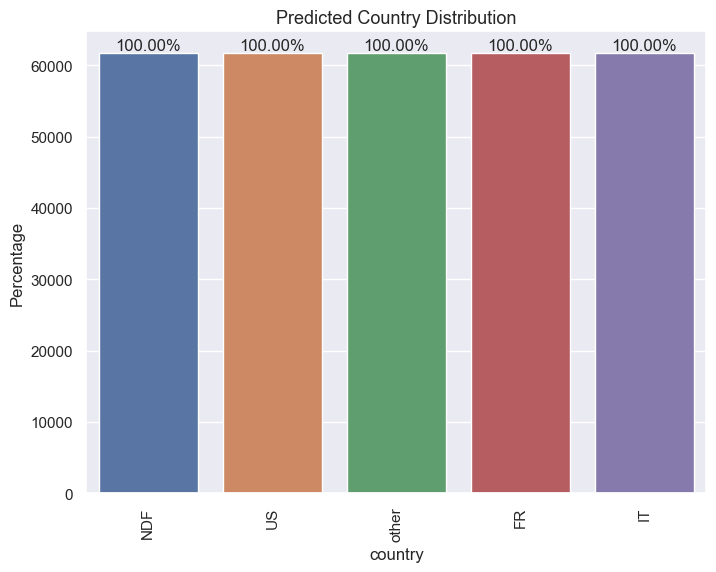

In [260]:
# Generate submission

sub = pd.DataFrame({"id" : ids,"country" : countries})

sub.to_csv('../data/submission_LR_norm10k.csv', index = False)

import seaborn as sns
import matplotlib.pyplot as plt

# Create the countplot
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))  # Optional: Set the figure size

# Calculate percentages
total_samples = len(test_data)
ax = sns.countplot(x='country', data=sub, order=sub['country'].value_counts().index)

# Add percentages to the plot
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_samples*100:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.title("Predicted Country Distribution", size=13)
plt.ylabel("Percentage")
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels if needed
plt.show()

# Submission1

In [261]:
#test csv

# Load and preprocess the test data
test_data = pd.read_csv("../data/test_merge_tfidf.csv")

test_df = pd.read_csv('../data/test_users.csv')

test_id = test_df['id'].values
test_data1 = test_data.values


test_id

# https://www.kaggle.com/kevinwu06/feature-importance-w-xgboost

pred = clf.predict_proba(test_data[selected_feature_names])

ids = []
countries = []

# Taking the 5 classes with highest probabilities

for i in range(len(test_data1)):
    idx = test_id[i]
    ids += [idx] * 5
    countries += le.inverse_transform(np.argsort(pred[i])[::-1][:5]).tolist()
    
# Generate submission

sub = pd.DataFrame({"id" : ids,"country" : countries})

sub.to_csv('../data/submission_LR2_new.csv', index = False)

NameError: name 'clf' is not defined

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the countplot
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))  # Optional: Set the figure size

# Calculate percentages
total_samples = len(test_data)
ax = sns.countplot(x='country', data=sub, order=sub['country'].value_counts().index)

# Add percentages to the plot
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_samples*100:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.title("Predicted Country Distribution", size=13)
plt.ylabel("Percentage")
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels if needed
plt.show()

# Submission

### data

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load and preprocess the test data
test_data = pd.read_csv("../data/Airbnb_xtest_v4.csv")

# Cleaning
test_data = test_data[selected_feature_names]

In [ ]:
test_data[selected_feature_names]

In [ ]:
#Checking null values
test_data.isnull().sum()

In [ ]:
test_data = test_data.dropna()

In [ ]:
# Predict using the trained model
test_predictions = pipeline.predict(test_data[selected_feature_names])

In [ ]:
y['country_destination'] = y['country_destination'].astype('category')

# # Map predicted class labels to category codes
test_data['predicted_country'] = pd.Categorical(test_predictions, categories=y['country_destination'].cat.categories)

In [ ]:
test_data

In [ ]:
test_data['predicted_country'].unique()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='predicted_country', data=test_data)
plt.title("predicted_country", size=13);

In [ ]:
# Predict using the trained model
# test_predictions = pipeline.predict(test_data)

submission = pd.read_csv("../data/sample_submission_NDF.csv")

# Prepare submission file
submission['country'] = test_data[['predicted_country']]

submission.to_csv('../data/submission.csv', index=False)